In [1]:
import os, glob, numpy as np, matplotlib.pyplot as plt, pandas as pd 
from tensorboard.backend.event_processing import event_accumulator 
from collections import defaultdict 

In [2]:
LOG_DIRS = ["./mpe_logs", "./cp_mpe_logs", "./new_cp_mpe_logs", "./cp-reps", "./env-search"] 
LOG_DIRS = ["./mpe_logs", "./cp-reps"] 

SAVE_NUMPY = False   
SMOOTH = 500    

STORE_EVERYTHING_SIZE_GUIDANCE = {
    'compressedHistograms': 0, 
    'images': 0, 
    'audio': 0, 
    'scalars': 0, 
    'histograms': 0, 
} 

CUT = 30_000     

In [3]:
def get_values(filename, scalar="Episodic_Reward"): 
    ea = event_accumulator.EventAccumulator(filename, size_guidance=STORE_EVERYTHING_SIZE_GUIDANCE)
    ea.Reload()
    print(ea.Tags()) 
    ea_scalar = ea.Scalars(tag=scalar) 
    ea_scalar = pd.DataFrame(ea_scalar) 
    return ea_scalar 

In [4]:
if SAVE_NUMPY: 
    logs = glob.glob(os.path.join(LOG_DIRS[-1], "*/**/event*"), recursive=True) 
    for log in logs: 
        print(log) 
        vals = get_values(log, scalar="Episodic Return")['value'].to_numpy() 
        # vals = get_values(log, scalar="Episodic_Reward")['value'].to_numpy() 
        path = "/".join(log.split("/")[:-1]) 
        with open(path+'/arr.npy', 'wb') as f: 
            np.save(f, vals) 
        # break 

In [5]:
def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    # return np.array(pd.Series(y).rolling(box_pts).mean()) 
    return y_smooth

In [6]:
logs = [] 
[logs.extend(glob.glob(os.path.join(log_dir, "*/**/*.npy"), recursive=True)) for log_dir in LOG_DIRS] 

exps = set() 
[exps.add("--".join(l.split("/")[-2].split("--")[:-1])) for l in logs] 
print(exps) 

# exps = [
#     item for item in exps 
#     if 
#     (('update_timestep' not in item) 
#     and ('cam_plus_other_obs' not in item)) 
# #     or ('update_timestep' in item) 
# #     and (int(item.split("--")[-1].split("_")[-1])<50)
# ]
# exps = [
#     item for item in exps 
#     if 'cam_new' not in item 
#     if 'cam_plus_other_obs' not in item 
#     and 'giam' not in item 
#     and 'noam' not in item 
# ]
# exps = [
#     item for item in exps 
#     if 'cam_new--n_2--cp_update_timestep_50' in item 
#     or 'cam_plus_other_obs--n_2--cp_update_timestep_20' in item 
#     or 'giam' in item 
#     or 'noam' in item 
# ]


{'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_200', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_100', 'giam--n_2', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_110', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_120', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_175', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_140', 'noam--n_2--random_other_agent_1', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_130', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_90', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_150', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_70', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_60', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_80', 'noam--n_2--random_other_agent_0'}


exp: cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_200
(6, 30000)
exp: cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_100
(13, 30000)
exp: giam--n_2
(21, 30000)
exp: cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_110
(10, 30000)
exp: cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_120
(8, 30000)
exp: cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_175
(9, 30000)
exp: cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_140
(11, 30000)
exp: noam--n_2--random_other_agent_1
(20, 30000)
exp: cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_130
(15, 30000)
exp: cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_90
(15, 30000)
exp: cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_150
(4, 30000)
exp: cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_70
(17, 30000)
exp: cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_60
(14, 300

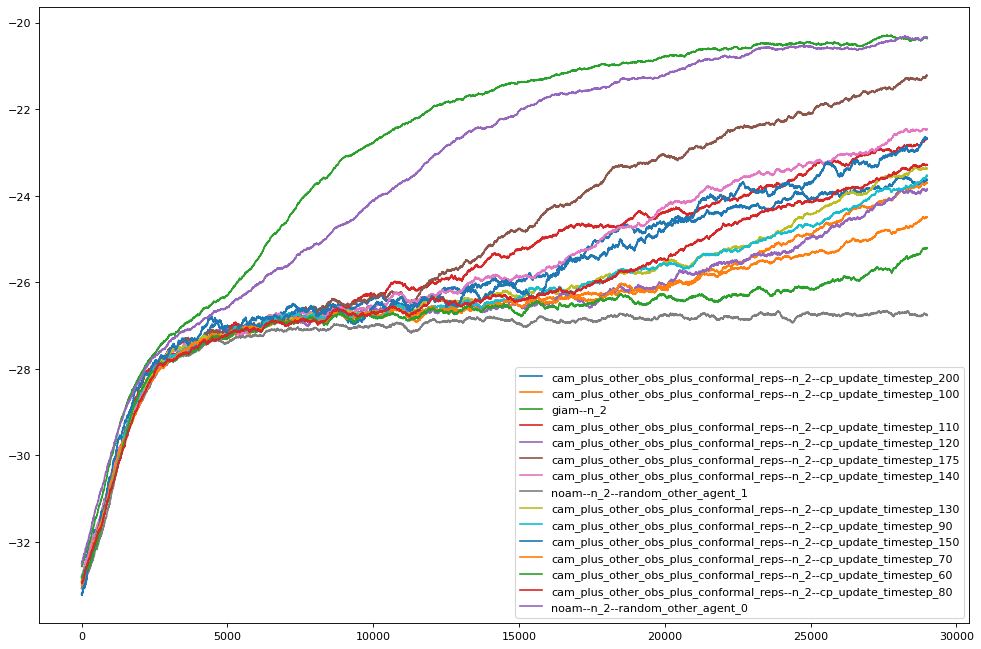

In [7]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80) 

vals = [] 
for e in exps: 
    print("exp:", e) 
    vals = [] 
    for l in logs: 
        if e in l: 
            x = np.load(l) 
            if (x.shape[0]>=CUT): 
                vals.append(x[:CUT]) 
    vals = np.array(vals)
    print(vals.shape)
    val_means = smooth(np.mean(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
    val_stds = smooth(np.std(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
    plt.plot(val_means, label = e )
plt.legend() 
plt.show() 


In [8]:
exps 

{'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_100',
 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_110',
 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_120',
 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_130',
 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_140',
 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_150',
 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_175',
 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_200',
 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_60',
 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_70',
 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_80',
 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_90',
 'giam--n_2',
 'noam--n_2--random_other_agent_0',
 'noam--n_2--random_other_agent_1'}

In [9]:
# logs = [] 
# [logs.extend(glob.glob(os.path.join(log_dir, "*/**/*.npy"), recursive=True)) for log_dir in LOG_DIRS] 

# exps = set() 
# [exps.add("--".join(l.split("/")[-3].split("--")[:-1])) for l in logs] 
# print(exps) 

# envs = set()
# [envs.add(e.split("--")[1]) for e in exps]
# print(envs) 

# from matplotlib.pyplot import figure


# vals = [] 
# for env in envs: 
#     figure(figsize=(15, 10), dpi=80) 
#     for e in exps: 
#         if env in e: 
#             print("exp:", e) 
#             vals = [] 
#             for l in logs: 
#                 if e in l: 
#                     x = np.load(l) 
#                     if (x.shape[0]>CUT): 
#                         vals.append(x[:CUT]) 
#             vals = np.array(vals)
#             print(vals.shape)
#             val_means = smooth(np.mean(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
#             val_stds = smooth(np.std(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
#             plt.plot(val_means, label = e )
#     plt.legend() 
#     plt.show() 
#     plt.close() 
